In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="ticks", color_codes=True)

# Exercise 7

In [3]:
df = pd.DataFrame({'x1': [0, 2, 0, 0, -1, 1],
                   'x2': [3, 0, 1, 1, 0, 1],
                   'x3': [0, 0, 3, 2, 1, 1],
                   'y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red', ]},
                  index=range(1, 7))
df

,x1,x2,x3,y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


## 7a

In [4]:
X = np.array(df.loc[:, 'x1':'x3'])
Y = np.array(df.loc[:, 'y'])

In [5]:
euclidean_distance = list()
for observation in range(X.shape[0]):
    euclidean_distance.append(np.sqrt(sum((X[observation] - np.zeros(3)) ** 2)))
    print('Euclidean distance for observation {} is {}'.format(observation, euclidean_distance[observation]))

Euclidean distance for observation 0 is 3.0
Euclidean distance for observation 1 is 2.0
Euclidean distance for observation 2 is 3.1622776601683795
Euclidean distance for observation 3 is 2.23606797749979
Euclidean distance for observation 4 is 1.4142135623730951
Euclidean distance for observation 5 is 1.7320508075688772


## 7b

In [6]:
min(euclidean_distance)

1.4142135623730951

In [7]:
euclidean_distance.index(min(euclidean_distance))

4

In [8]:
Y[euclidean_distance.index((min(euclidean_distance)))]

'Green'

## 7c

In [9]:
K = 3

In [10]:
pd.Series(euclidean_distance).sort_values()[:K].index

Int64Index([4, 5, 1], dtype='int64')

In [11]:
Y[pd.Series(euclidean_distance).sort_values()[:K].index]

array(['Green', 'Red', 'Red'], dtype=object)

In [12]:
unique, counts = np.unique(Y[pd.Series(euclidean_distance).sort_values()[:3].index], return_counts=True)

In [13]:
df = pd.DataFrame(zip(unique, counts), columns=['Label', 'Count'])
df

,Label,Count
0,Green,1
1,Red,2


In [14]:
df.loc[df['Count'] == max(df['Count']), 'Label']

1    Red
Name: Label, dtype: object

# Exercise 8

In [15]:
college = pd.read_csv('data/college.csv', index_col=0)

## 8a

In [16]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


## 8b

In [17]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## 8c (i)

In [18]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## 8c (ii)

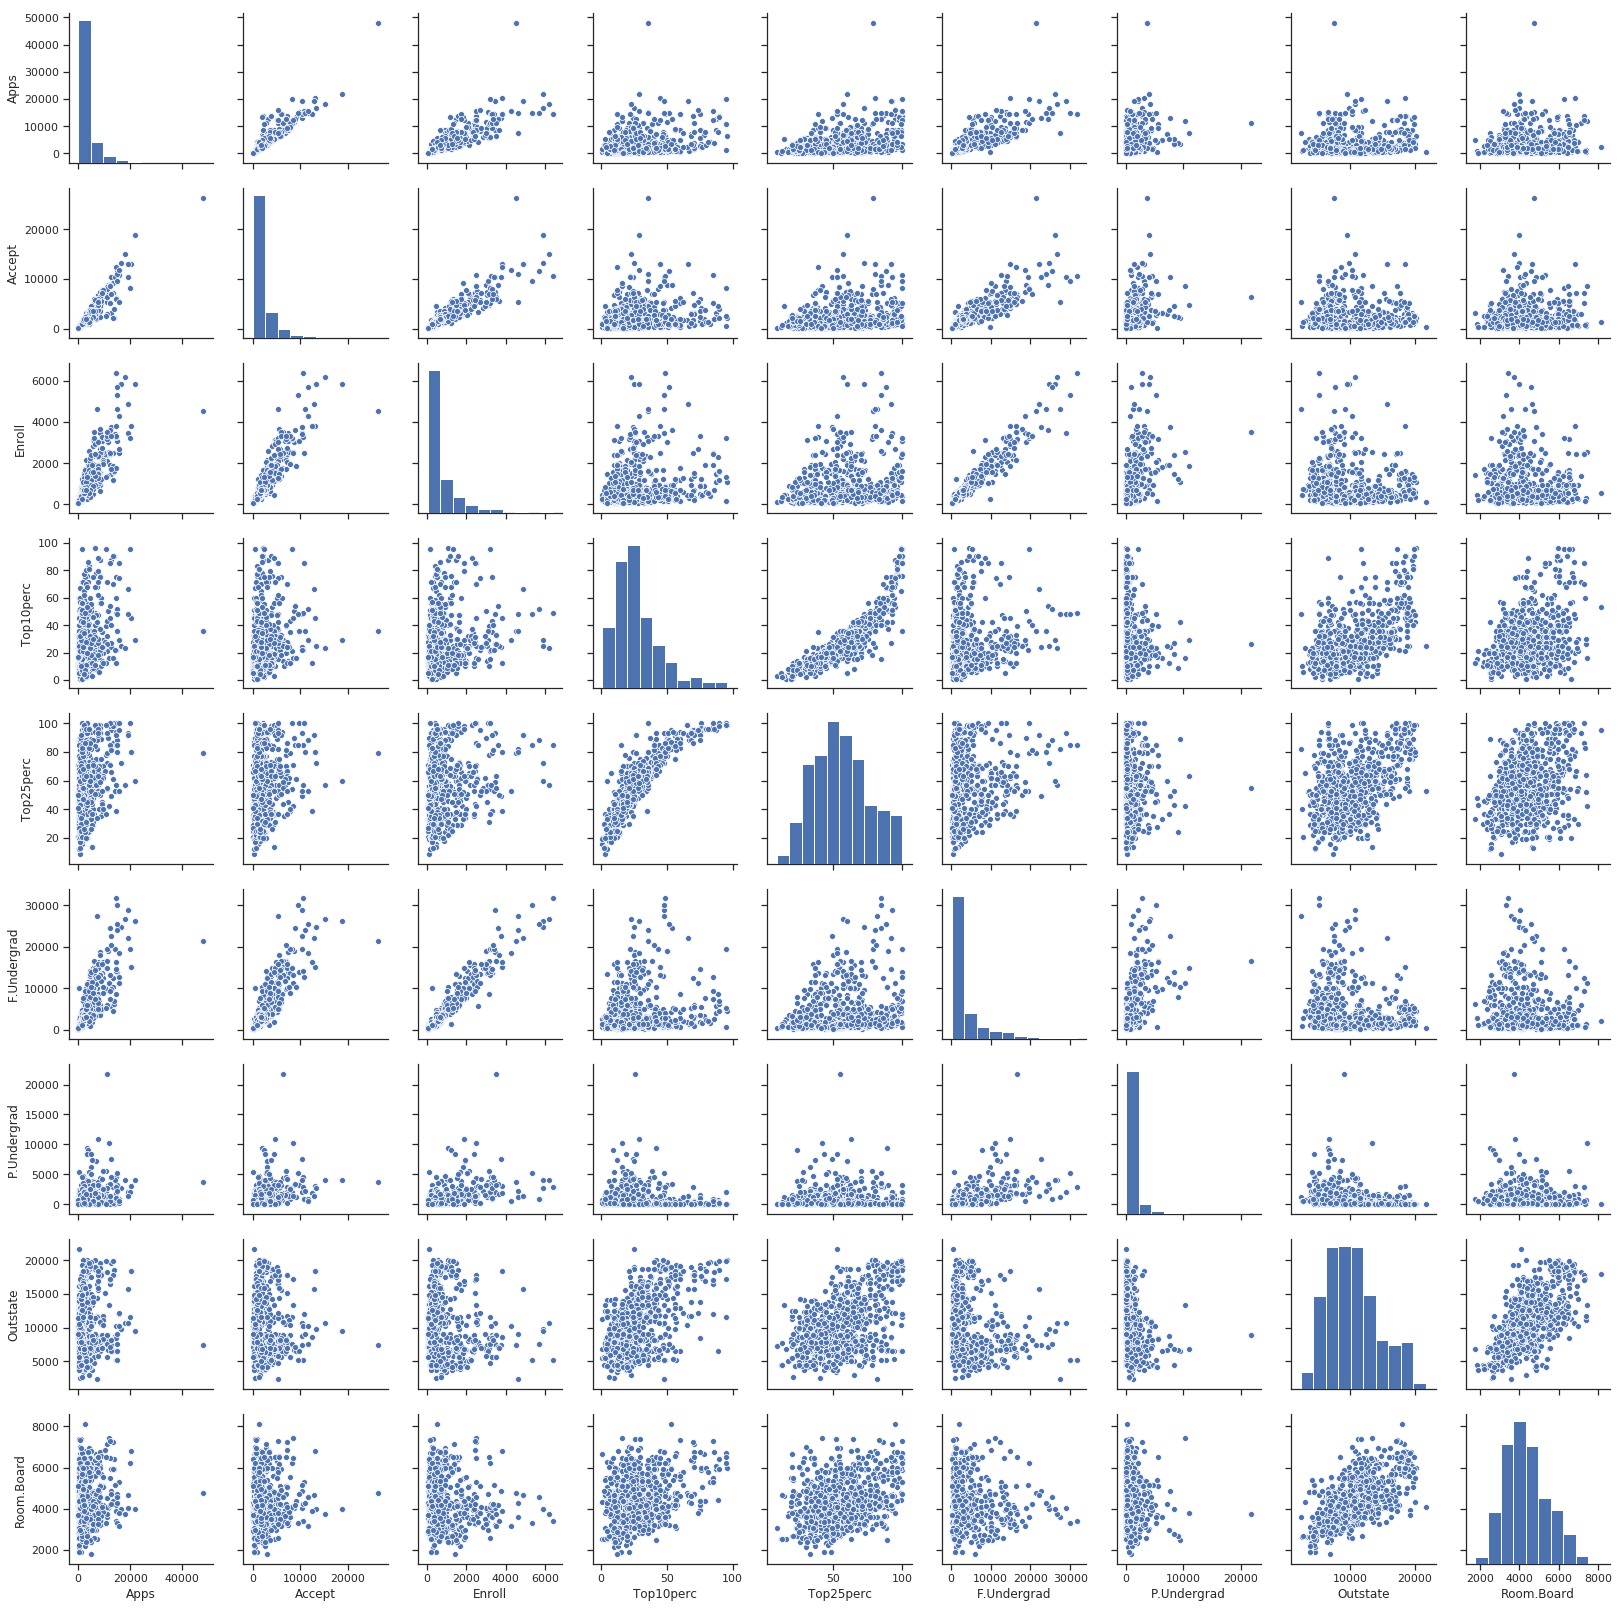

In [19]:
sns.pairplot(college.iloc[:,:10])
plt.show()

## 8c (iii)

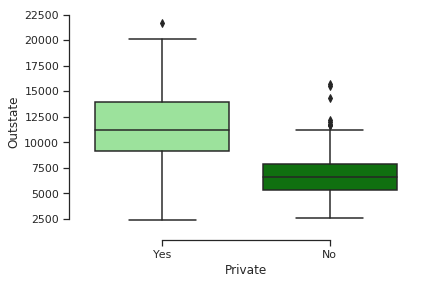

In [20]:
sns.boxplot(x='Private', y='Outstate', palette=['lightgreen', 'green'], data=college)
sns.despine(offset=10, trim=True)
plt.show()

## 8c (iv)

In [21]:
college['Elite'] = college['Top10perc'].apply(lambda x: 'Yes' if x > 50 else 'No')

In [22]:
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

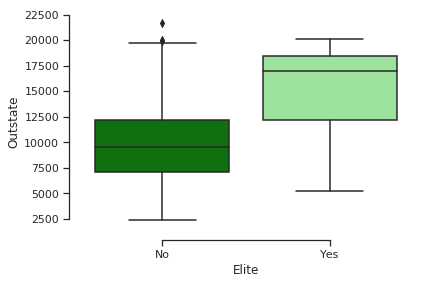

In [23]:
sns.boxplot(x='Elite', y='Outstate', palette=['green', 'lightgreen'], data=college)
sns.despine(offset=10, trim=True)
plt.show()

## 8c (iv)

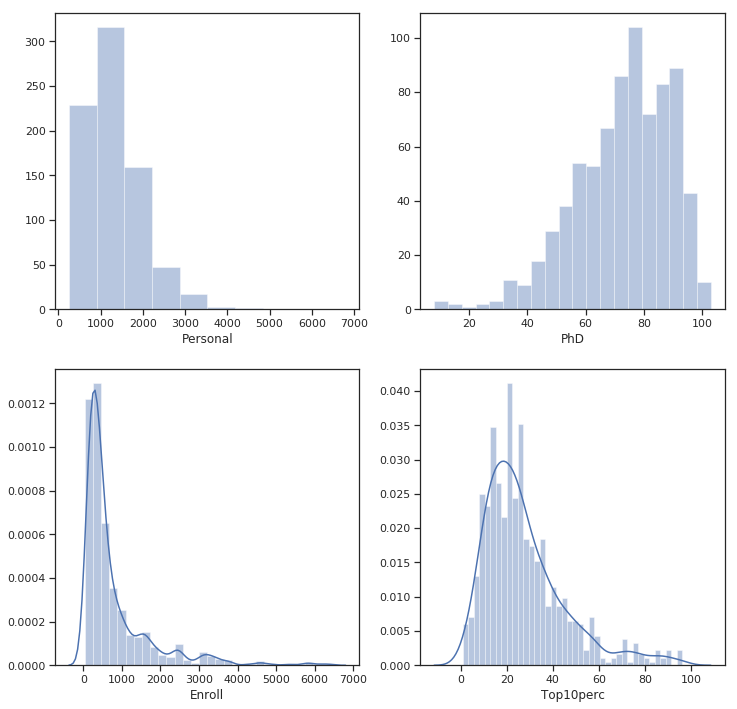

In [24]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.distplot(college['Personal'], bins=10, kde=False, ax=ax1)
sns.distplot(college['PhD'], bins=20, kde=False, ax=ax2)
sns.distplot(college['Enroll'], bins=30, kde=True, ax=ax3)
sns.distplot(college['Top10perc'], bins=40, kde=True, ax=ax4)
plt.show()

# Exercise 9

In [25]:
auto = pd.read_csv('data/auto.csv', index_col=0)

## 9a

In [26]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 1 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [27]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
for column in auto.columns:
    if auto[column].dtype != object:
        print(column)

mpg
cylinders
displacement
horsepower
weight
acceleration
year
origin


## 9b

In [29]:
auto.describe(exclude=['object']).loc[['min', 'max']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0,1.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0,3.0


## 9c

In [30]:
auto.describe(exclude=['object']).loc[['mean', 'std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518


## 9d

In [31]:
auto[~auto.index.isin(auto.iloc[10:86].index)].describe(exclude=['object']).loc[['min', 'max', 'mean', 'std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910


## 9e

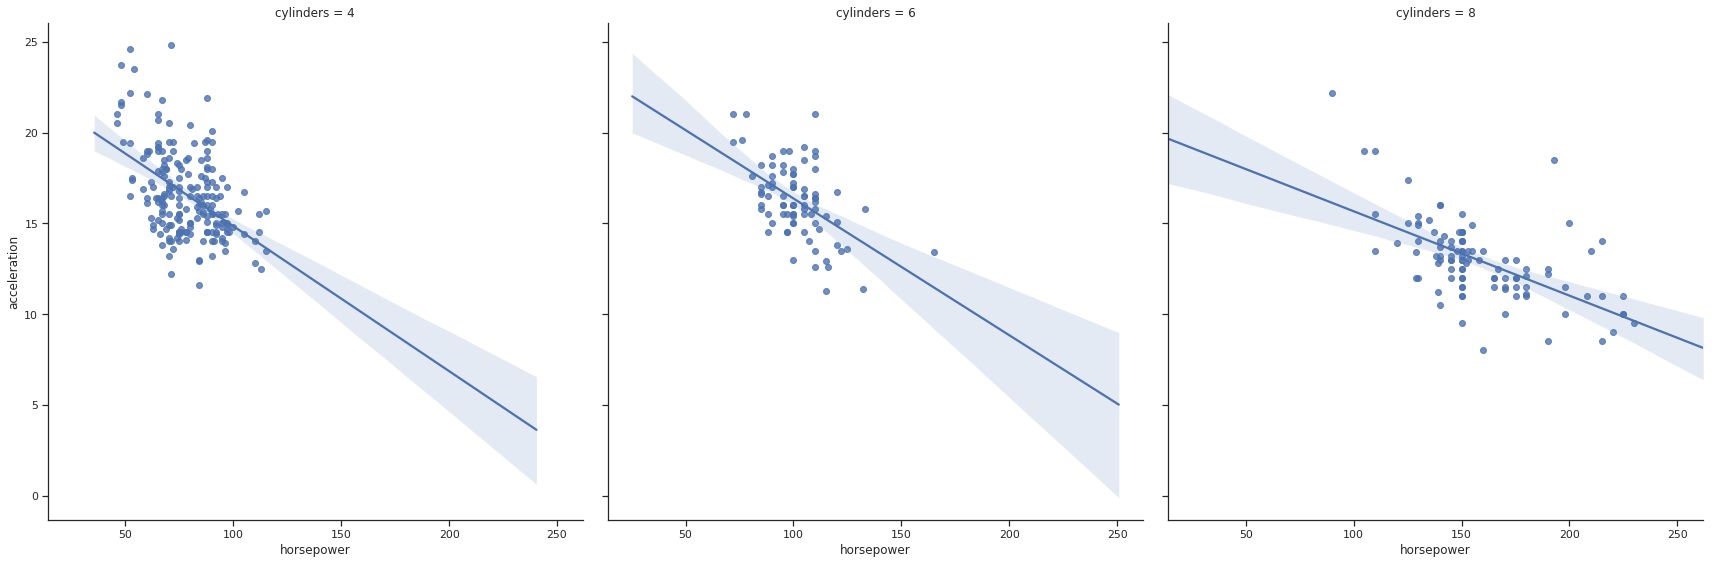

In [32]:
sns.lmplot(x='horsepower', y='acceleration', col='cylinders', height=8, data=auto[auto.cylinders.isin([4,6,8])])
plt.show()

In [33]:
auto['brand'] = [x.split()[0] for x in auto.name]

In [34]:
auto.loc[auto['brand'].isin(['chevroelt', 'chevy']), 'brand'] = 'chevrolet'
auto.loc[auto['brand'].isin(['maxda']), 'brand'] = 'mazda'
auto.loc[auto['brand'].isin(['mercedes-benz']), 'brand'] = 'mercedes'
auto.loc[auto['brand'].isin(['toyouta']), 'brand'] = 'toyota'
auto.loc[auto['brand'].isin(['vokswagen']), 'brand'] = 'volkswagen'

In [35]:
brand_counts = auto['brand'].value_counts().rename('counts').to_frame()
brand_selection = brand_counts[brand_counts['counts'] >= 12].index

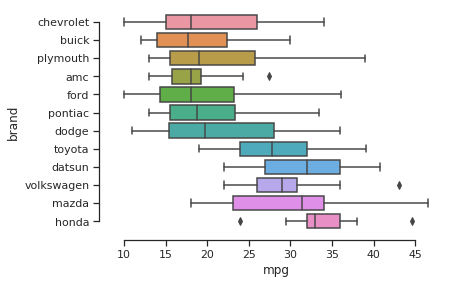

In [36]:
sns.boxplot(x='mpg', y='brand', data=auto[auto.brand.isin(brand_selection)])
sns.despine(offset=10, trim=True)
plt.show()

## 9f

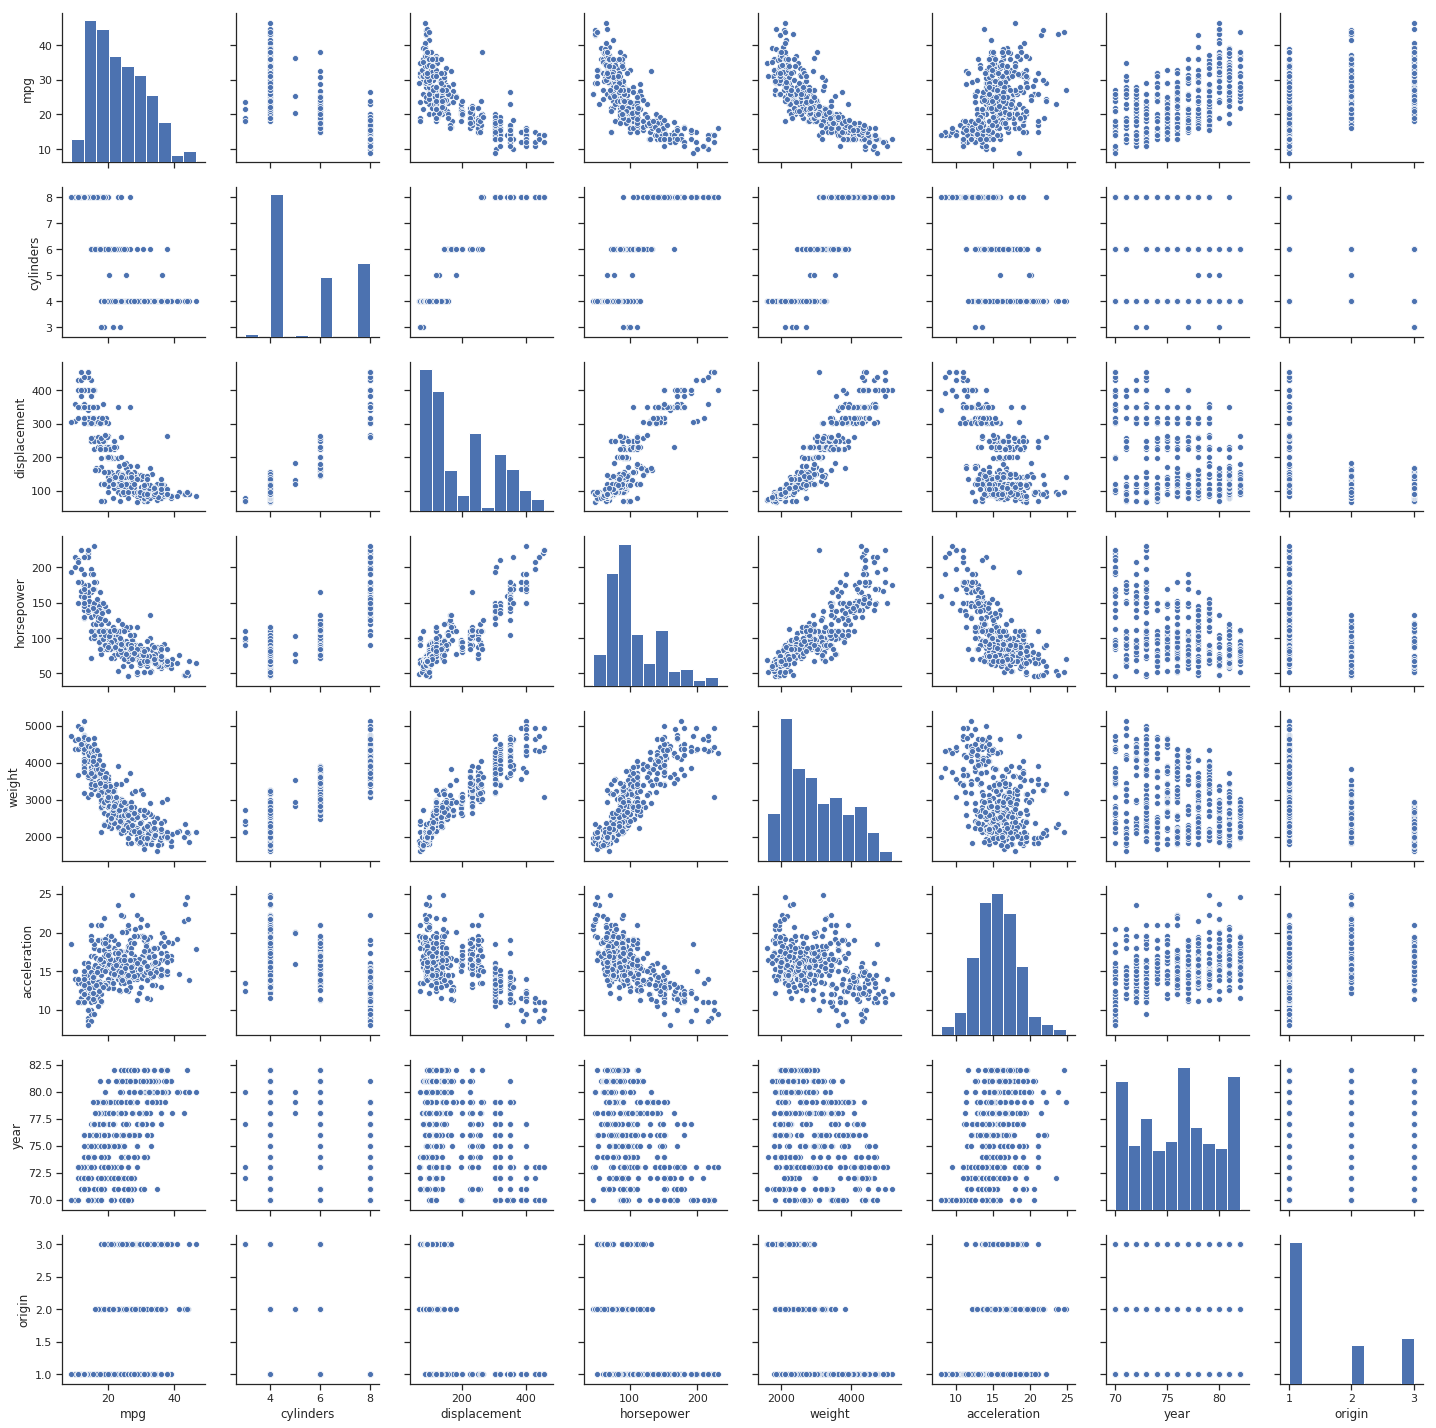

In [37]:
sns.pairplot(auto.iloc[:,:-1])
plt.show()

Yes, the plot shows that there are relationships between `mpg` and other variables in the data set like `displacement`, `horsepower`, `weight` and `year`.

# Exercise 10

## 10a

In [38]:
boston = pd.read_csv('data/boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
boston.shape

(506, 14)

| Column | Description |
| ------ | ------ |
|crim|per capita crime rate by town.|
|zn|proportion of residential land zoned for lots over 25,000 sq.ft.|
|indus|proportion of non-retail business acres per town.|
|chas|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).|
|nox|nitrogen oxides concentration (parts per 10 million).|
|rm|average number of rooms per dwelling.|
|age|proportion of owner-occupied units built prior to 1940.|
|dis|weighted mean of distances to five Boston employment centres.|
|rad|index of accessibility to radial highways.|
|tax|full-value property-tax rate per \$10,000.|
|ptratio|pupil-teacher ratio by town.|
|black|1000(Bk - 0.63^2 where Bk is the proportion of blacks by town.|
|lstat|lower status of the population (percent).|
|medv|median value of owner-occupied homes in $1000s.|

## 10b

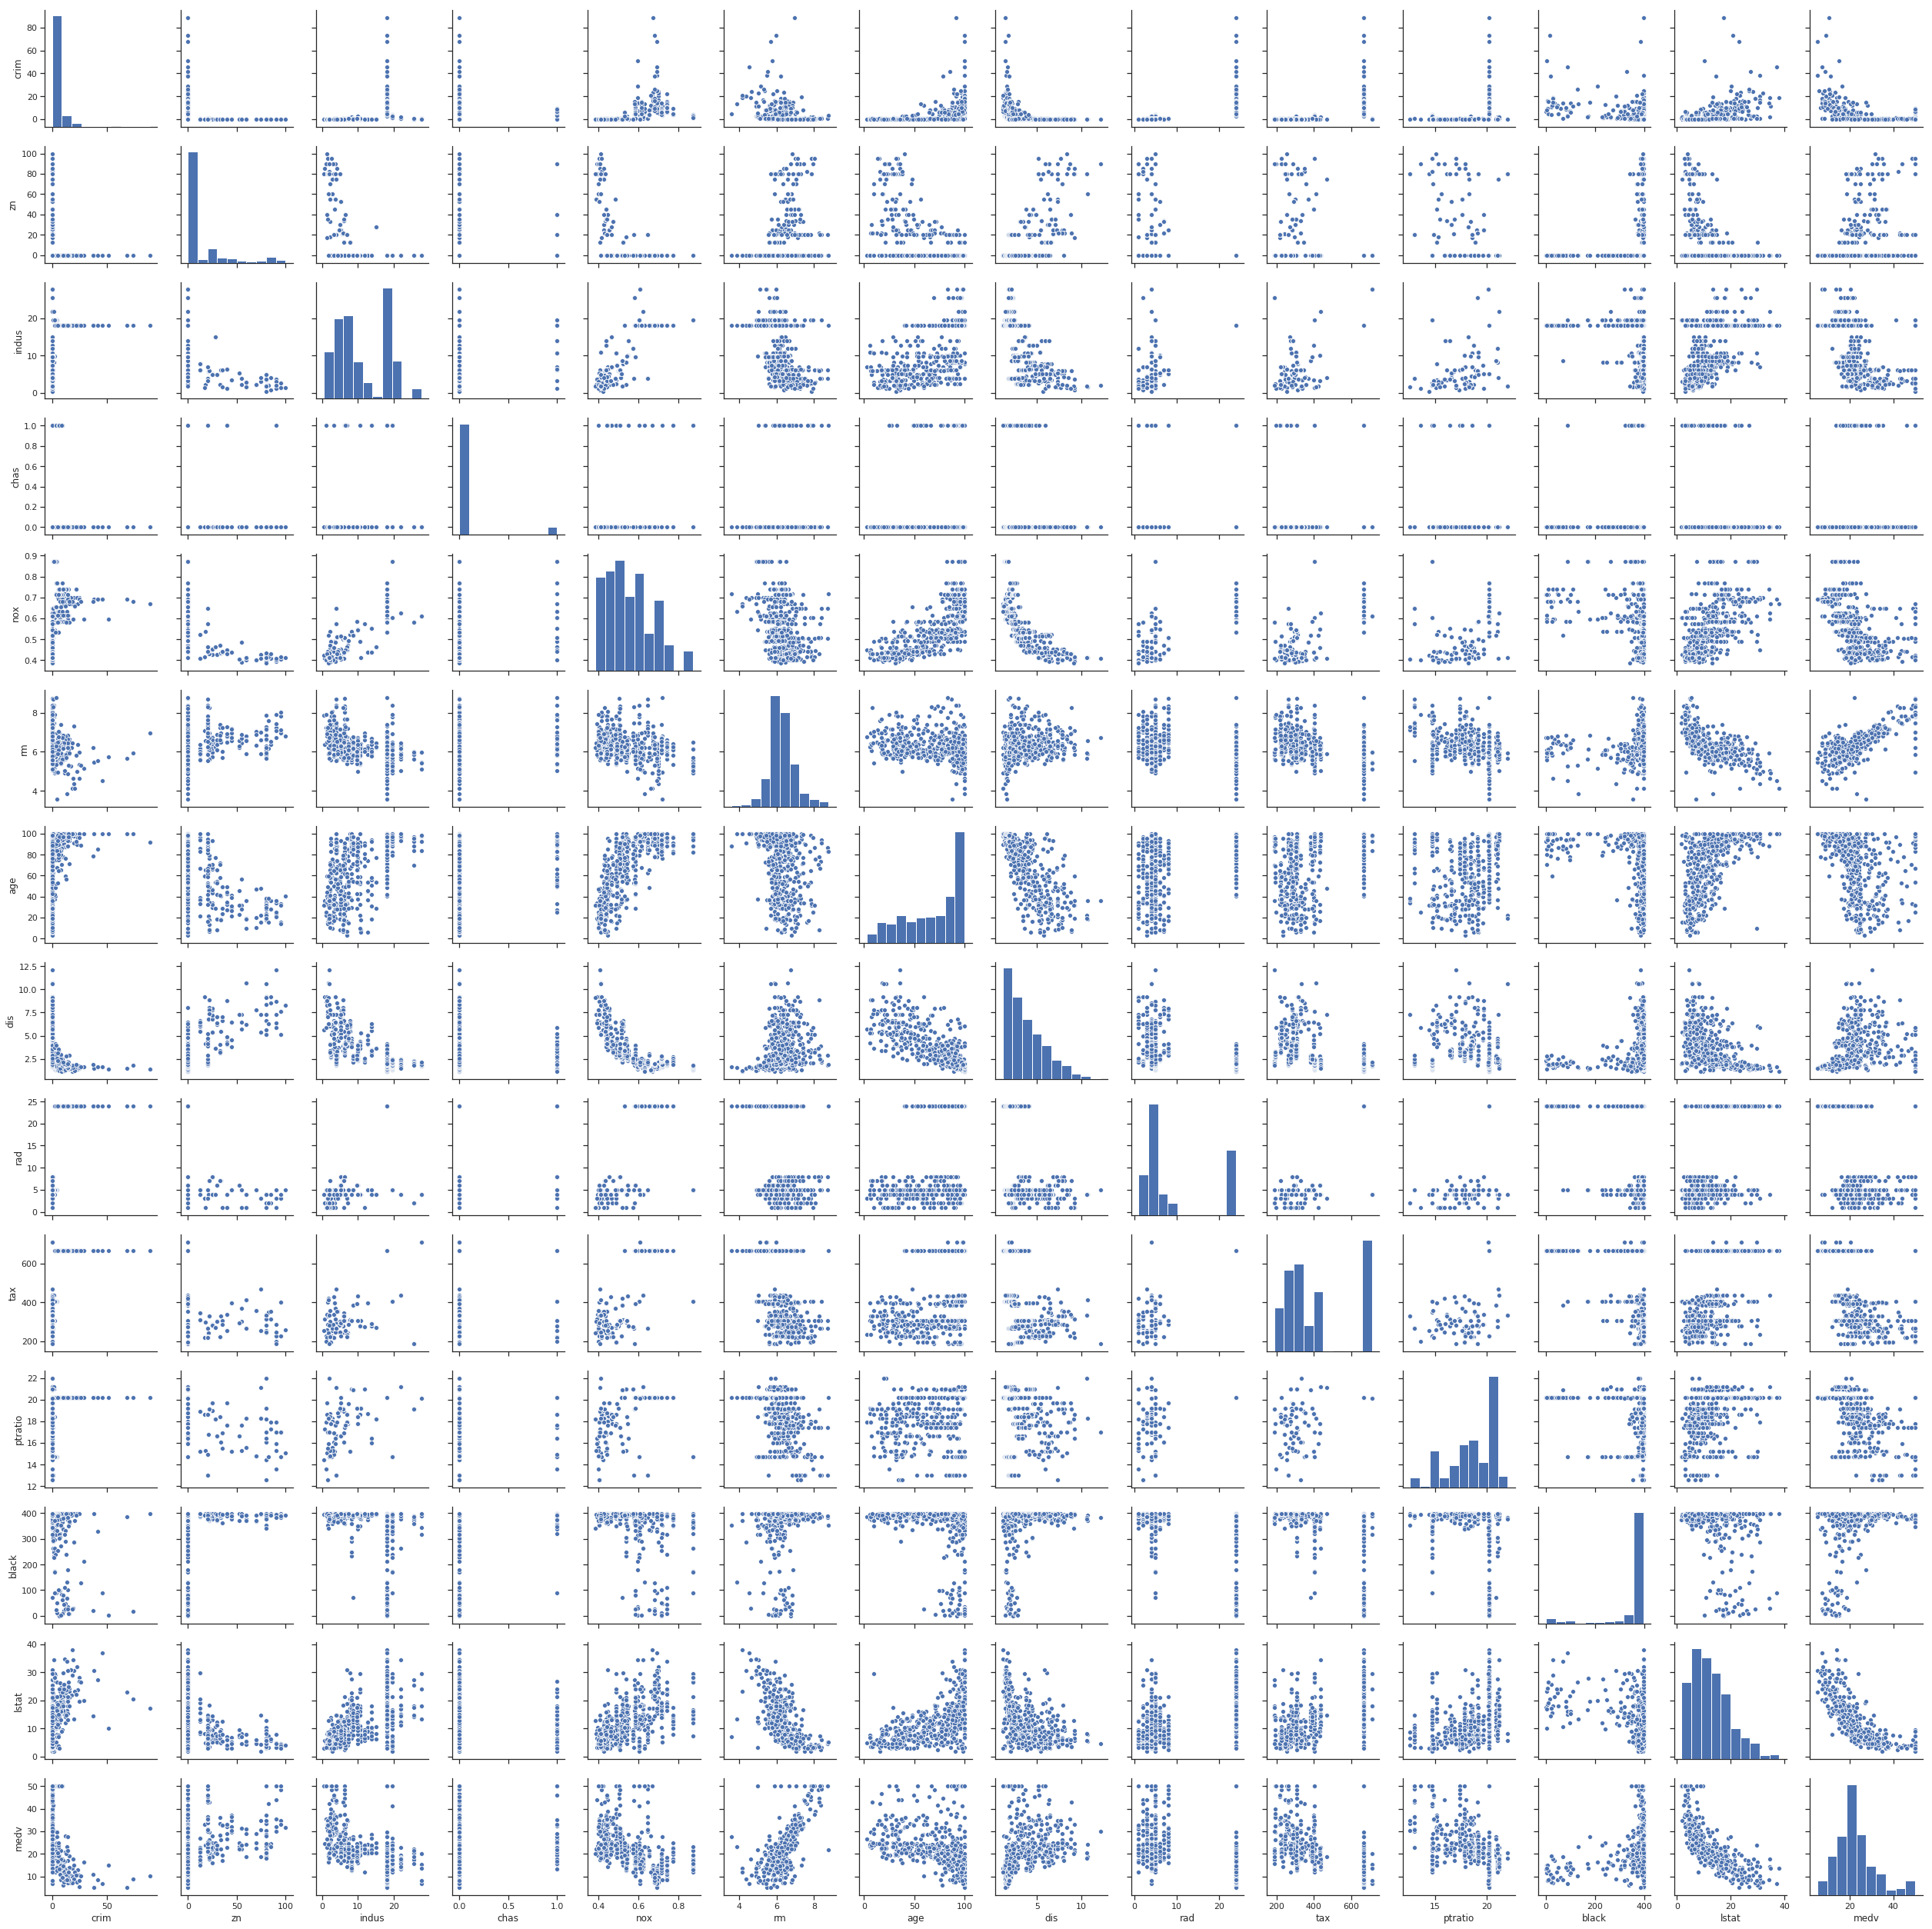

In [40]:
sns.pairplot(boston)
plt.show()

## 10c

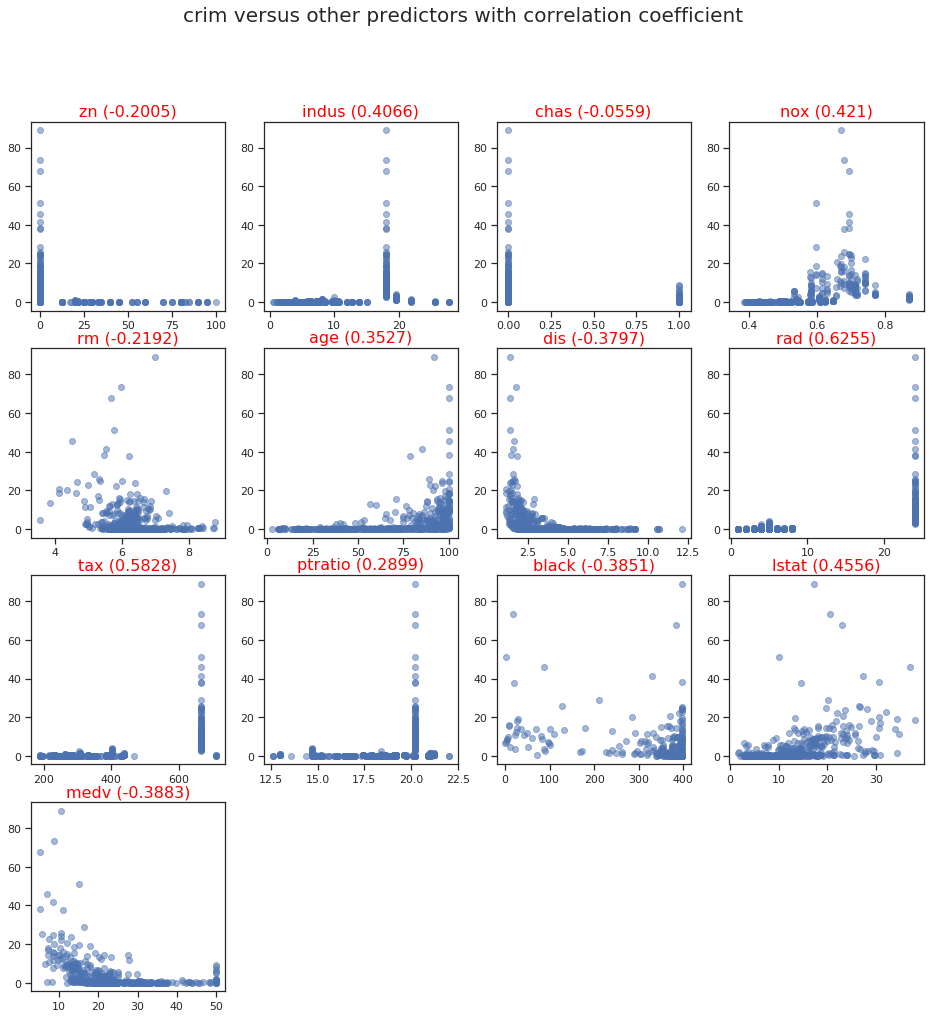

In [41]:
f = plt.figure(figsize=(16, 16))
f.suptitle('crim versus other predictors with correlation coefficient', fontsize=20)
for num, col in enumerate(boston.columns[1:]):
    plt.subplot(4, 4, num + 1)
    plt.scatter(boston[col].values, boston['crim'].values, alpha=0.5)
    plt.title('{} ({})'.format(col, round(boston.corr().loc['crim', col], 4)), color='red', fontsize=16)

Based on the correclation matrix data, there seems to be no predictors with a strong correlation with the per capita crime rate.

## 10d

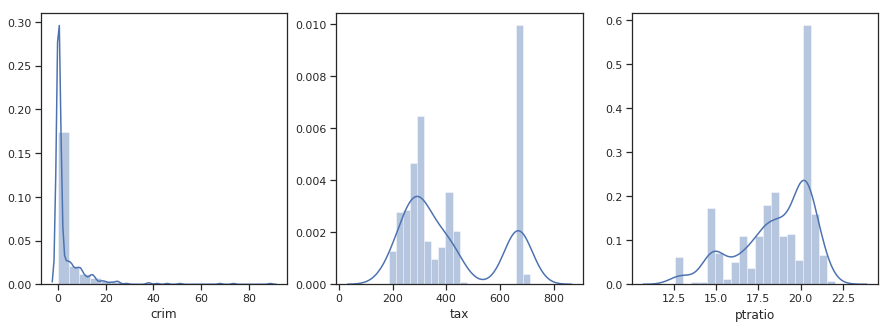

In [42]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.distplot(boston['crim'], bins=20, kde=True, ax=ax1)
sns.distplot(boston['tax'], bins=20, kde=True, ax=ax2)
sns.distplot(boston['ptratio'], bins=20, kde=True, ax=ax3)
plt.show()

Yes, there are (some) 'spikes' in the histograms for `crim`, `tax` and `pratio`.

## 10e

In [43]:
boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [44]:
# answer
boston['chas'].value_counts().loc[1]

35

## 10f

In [45]:
np.median(boston['ptratio'])

19.05

## 10g

In [46]:
boston[boston['medv'] == min(boston['medv'])]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


## 10h

In [47]:
boston[boston['rm'] > 7].shape[0]

64

In [48]:
rm8 = boston[boston['rm'] > 8]
rm8

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
205,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
226,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
227,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
233,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
234,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
254,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
258,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


In [49]:
rm8.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.291706,0.840652,0.875111,0.737995,0.622949,0.306343,-0.371006,0.862424,0.960894,0.324048,-0.835140,0.215326,-0.682900
zn,-0.291706,1.000000,-0.370875,-0.229776,-0.310651,-0.312557,-0.584476,0.345204,-0.289211,-0.375746,-0.393431,0.262952,-0.096870,0.330570
indus,0.840652,-0.370875,1.000000,0.967948,0.540284,0.415950,0.321491,-0.284717,0.610745,0.838952,0.291220,-0.579955,-0.093511,-0.430846
chas,0.875111,-0.229776,0.967948,1.000000,0.587545,0.404425,0.304094,-0.329061,0.585793,0.837557,0.200397,-0.577909,-0.001616,-0.452457
nox,0.737995,-0.310651,0.540284,0.587545,1.000000,0.716770,0.632545,-0.705259,0.520379,0.571921,-0.258565,-0.636994,0.563515,-0.263789
rm,0.622949,-0.312557,0.415950,0.404425,0.716770,1.000000,0.381211,-0.428368,0.546624,0.522883,0.015282,-0.587830,0.411793,-0.158056
age,0.306343,-0.584476,0.321491,0.304094,0.632545,0.381211,1.000000,-0.923583,0.137973,0.201441,-0.227084,-0.342704,0.261471,-0.072142
dis,-0.371006,0.345204,-0.284717,-0.329061,-0.705259,-0.428368,-0.923583,1.000000,-0.181516,-0.208478,0.377533,0.454419,-0.445624,0.031439
rad,0.862424,-0.289211,0.610745,0.585793,0.520379,0.546624,0.137973,-0.181516,1.000000,0.910360,0.588191,-0.919999,0.103760,-0.794848
tax,0.960894,-0.375746,0.838952,0.837557,0.571921,0.522883,0.201441,-0.208478,0.910360,1.000000,0.561435,-0.817892,0.067049,-0.787714


In [50]:
rm8.corr().loc['rm',:].drop('rm', axis=0).sort_values()

black     -0.587830
dis       -0.428368
zn        -0.312557
medv      -0.158056
ptratio    0.015282
age        0.381211
chas       0.404425
lstat      0.411793
indus      0.415950
tax        0.522883
rad        0.546624
crim       0.622949
nox        0.716770
Name: rm, dtype: float64

`nox` has a relative high correlation with `rm` when subsetted on an avarage of more than 8 rooms.

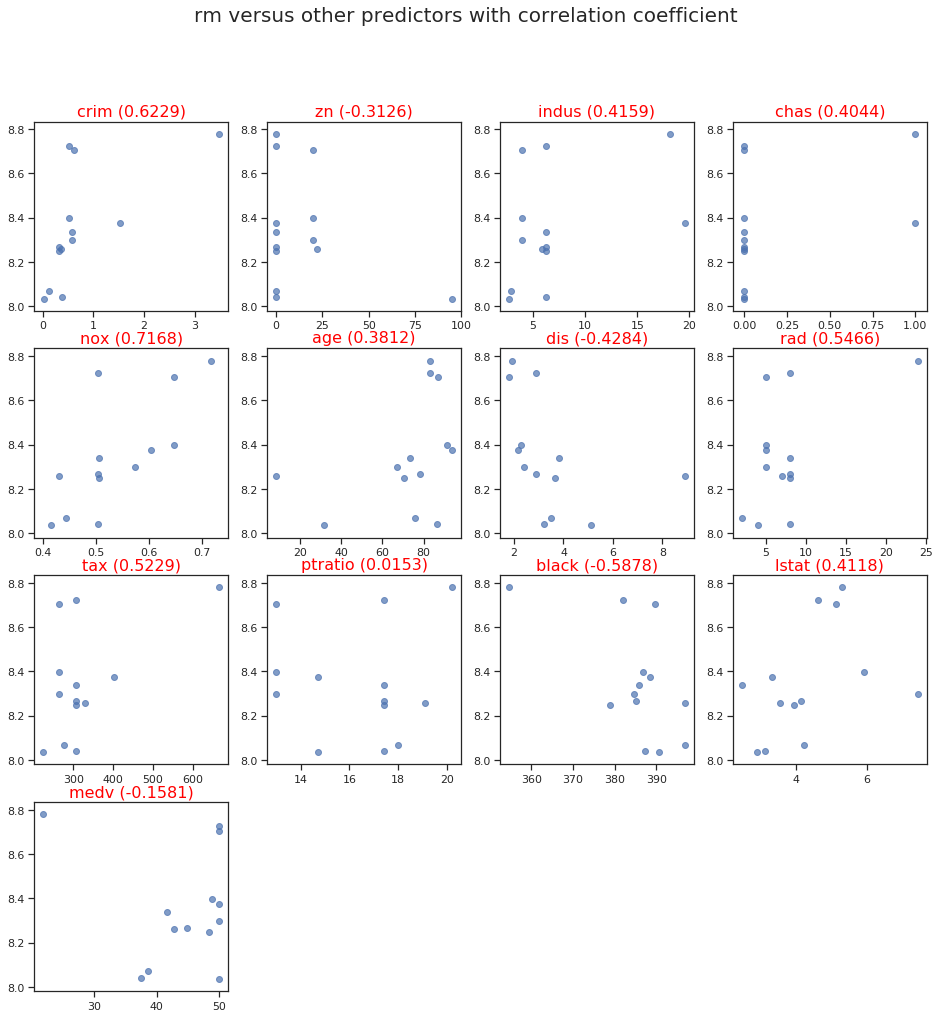

In [51]:
predictors = list(rm8.columns)
predictors.remove('rm')

f = plt.figure(figsize=(16, 16))
f.suptitle('rm versus other predictors with correlation coefficient', fontsize=20)
for num, col in enumerate(predictors):
    plt.subplot(4, 4, num + 1)
    plt.scatter(rm8[col].values, rm8['rm'].values, alpha=0.7)
    plt.title('{} ({})'.format(col, round(rm8.corr().loc['rm', col], 4)), color='red', fontsize=16)